# Initialize Settings

In [1]:
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import time, os, pickle
from math import comb
from random import uniform, seed, choice
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from copy import deepcopy
from itertools import combinations
from IMGraph import IMGraph
from utils import *
from vis_functions import vis_methods_spread, vis_methods_time, vis_methods, vis_feature_delta, font

# For local test
dolphin_file_name = "/Users/chenxiaolong/Desktop/ddm/5056/final/dolphins/dolphins.gml"
hens_file_name = "./data/aves-hens-pecking-order/aves-hens-pecking-order.edges"
email_file_name = "./data/email-enron-only/email-enron-only.mtx"
songbird_file_name = "./data/aves-songbird-social/aves-songbird-social.edges"

sparrow_file_name = "./data/aves-sparrow-social/aves-sparrow-social.edges"
retweet_file_name = "./data/rt-retweet/rt-retweet.mtx"
karate_file_name = "./data/soc-karate/soc-karate.mtx"

wiki_vote_file_name = "./data/soc-wiki-Vote/soc-wiki-Vote.mtx"
netscience_file_name = "./data/ca-netscience/ca-netscience.mtx"
weaver_file_name = "./data/aves-weaver-social/aves-weaver-social.edges"
retweet_copen_file_name = "./data/rt-twitter-copen/rt-twitter-copen.mtx"
fb_mit_file_name = "./data/socfb-MIT/socfb-MIT.mtx"
fb_haverford_file_name = "./data/socfb-Haverford76/socfb-Haverford76.mtx"
email_univ_file_name = "./data/email-univ/email-univ.edges"

dataset_names = [
    "dolphin",
    "email_enron",
    "songbird",
    "sparrow",
    "retweet",
    "karate"
]

is_directed = [
    False,
    False,
    False,
    False,
    True,
    False
]
dataset_list = [
    dolphin_file_name,
    email_file_name,
    songbird_file_name,
    sparrow_file_name,
    retweet_file_name,
    karate_file_name
]


large_data_names = [
    "wiki-vote",
    "ca-netscience",
    "weaver",
    "retweet-copen",
    "email-univ"
]

large_isdirected = [
    True, False, False, True, False
]

large_data_list = [
    wiki_vote_file_name,
    netscience_file_name,
    weaver_file_name,
    retweet_copen_file_name,
    email_univ_file_name
]

In [ ]:
# For autodl
dolphin_file_name = "./data/dolphins/dolphins.gml"
hens_file_name = "./data/hens/aves-hens-pecking-order.edges"
email_file_name = "./data/email/email-enron-only.mtx"
songbird_file_name = "./data/songbird/aves-songbird-social.edges"

sparrow_file_name = "./data/sparrow/aves-sparrow-social.edges"
retweet_file_name = "./data/retweet/rt-retweet.mtx"
karate_file_name = "./data/karate/soc-karate.mtx"

wiki_vote_file_name = "./data/wiki_vote/soc-wiki-Vote.mtx"
netscience_file_name = "./data/ca_netscience/ca-netscience.mtx"
weaver_file_name = "./data/weaver/aves-weaver-social.edges"
retweet_copen_file_name = "./data/rt_copen/rt-twitter-copen.mtx"

fb_mit_file_name = "./data/socfb-MIT/socfb-MIT.mtx"
fb_haverford_file_name = "./data/socfb-Haverford76/socfb-Haverford76.mtx"
soc_hamsterster_file_name = "./data/soc-hamsterster/soc-hamsterster.edges"
email_univ_file_name = "./data/email-univ/email-univ.edges"

dataset_names = [
    "dolphin",
    "email_enron",
    "songbird",
    "sparrow",
    "retweet",
    "karate"
]

is_directed = [
    False,
    False,
    False,
    False,
    True,
    False
]
dataset_list = [
    dolphin_file_name,
    email_file_name,
    songbird_file_name,
    sparrow_file_name,
    retweet_file_name,
    karate_file_name
]


large_data_names = [
    "wiki-vote",
    "ca-netscience",
    "weaver",
    "retweet-copen",
    "email-univ"
]

large_isdirected = [
    True, False, False, True, False
]

large_data_list = [
    wiki_vote_file_name,
    netscience_file_name,
    weaver_file_name,
    retweet_copen_file_name,
    email_univ_file_name
]

# Experiment on small datasets

In [ ]:
# Cell to test file input, load graph
for i in range(len(dataset_names)):
    cur_file = dataset_list[i]
    IM_G = IMGraph(cur_file, mc=1000,directed=is_directed[i])

for i in range(len(large_data_names)):
    cur_file = large_data_list[i]
    IM_G = IMGraph(cur_file, mc=1000,directed=is_directed[i])

In [ ]:
np.random.seed(5002)

In [ ]:
for i in range(len(dataset_list)):
# for i in range(1):
    file_path = dataset_list[i]
    try:
        IM_G = IMGraph(file_path, mc=1000, directed = is_directed[i], eps=.2)
        print(f"For dataset {dataset_names[i]}")
        print(f"n={IM_G.n}, m={IM_G.m}")
        print("Running CELF...")
        IM_G.run_celf()
        
        print("Running IMM")
        IM_G.run_IMM_for_all_k()
        IM_G.estimate_spread("IMM")

        print("Running my method")
        IM_G.run_sketch_for_all_k()
        IM_G.estimate_spread("my_method")

        save_instance(IM_G, f"./IM_G_instances/IM_G_sketch_{i}.pickle")
        # vis_methods_spread(IM_G, save_to_path=f"./figures/method_spread_{dataset_names[i]}.eps")
        # vis_methods_time(IM_G, save_to_path=f"./figures/method_time_{dataset_names[i]}.eps")
        # vis_methods(IM_G)
        vis_methods(IM_G, save_to_path=f"./figures/methods_{dataset_names[i]}.eps")
    except Exception as e:
        print(dataset_names[i])
        print(e)
        pass

# Experiments on larger datasets

In [ ]:
for i in range(len(large_data_list)):
# for i in range(len(large_data_list)-1, len(large_data_list)):
    file_path = large_data_list[i]
    try:
        IM_G = IMGraph(file_path, directed = large_isdirected[i], eps=.2)
        print(f"For dataset {large_data_names[i]}")
        print(f"n={IM_G.n}, m={IM_G.m}")
        
        print("Running IMM")
        IM_G.run_IMM_for_all_k()
        IM_G.estimate_spread("IMM")

        print("Running my method")
        IM_G.run_sketch_for_all_k()
        IM_G.estimate_spread("my_method")

        save_instance(IM_G, f"./IM_G_instances/IM_G_sketch_large_{i}.pickle")
        # vis_methods_spread(IM_G, save_to_path=f"./figures/method_spread_{dataset_names[i]}.eps")
        # vis_methods_time(IM_G, save_to_path=f"./figures/method_time_{dataset_names[i]}.eps")
        # vis_methods(IM_G)
        vis_methods(IM_G, save_to_path=f"./figures/methods_{large_data_names[i]}.eps")
    except Exception as e:
        print(dataset_names[i])
        print(e)
        pass

dolphin: n=62, m=159


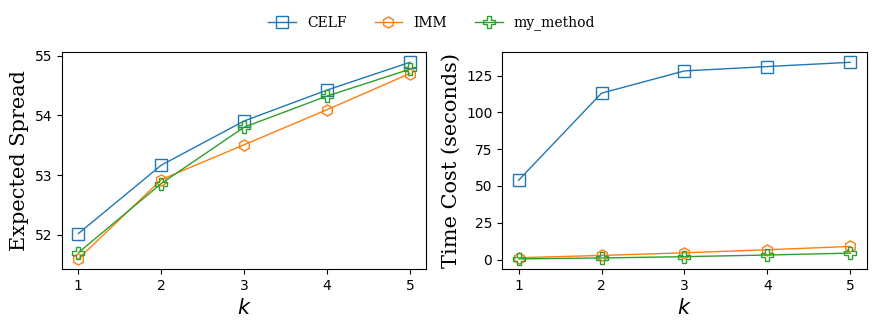

email_enron: n=143, m=623


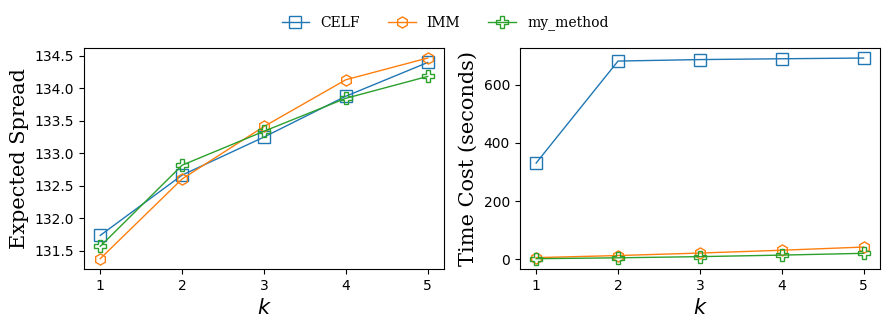

songbird: n=110, m=1027


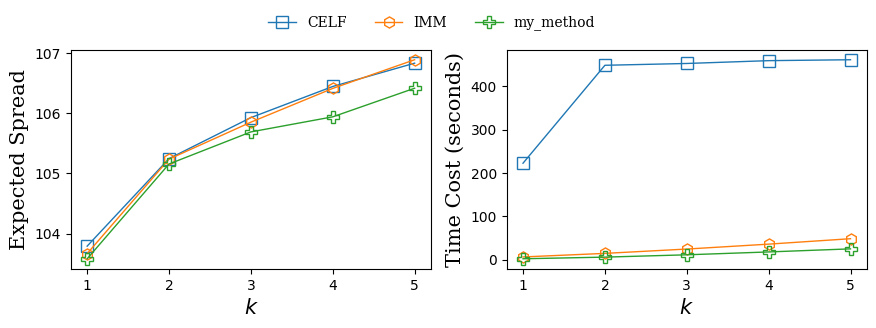

sparrow: n=52, m=454


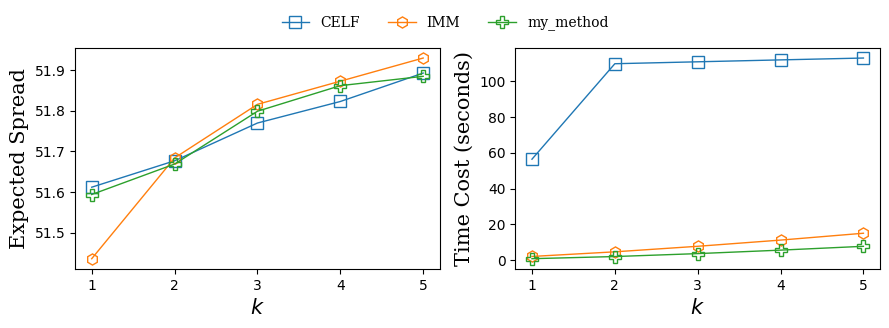

retweet: n=96, m=117


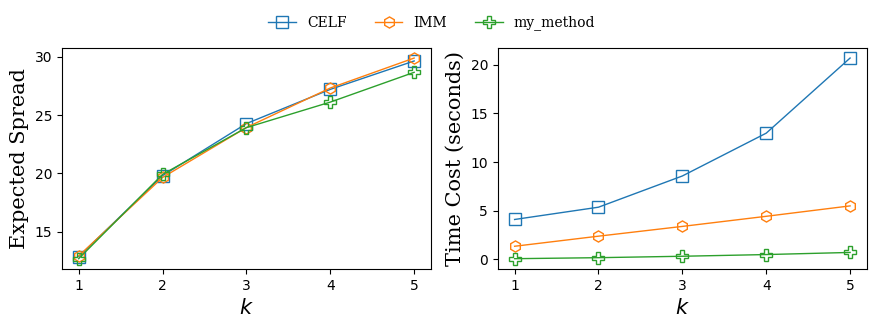

karate: n=34, m=78


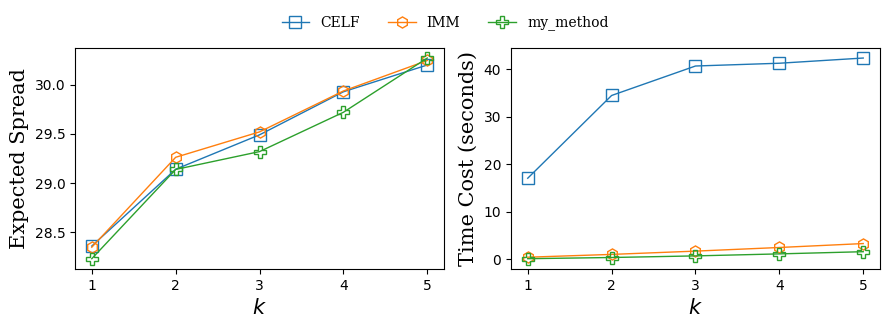

In [2]:
IM_G_list = []
for i in range(0, len(dataset_list)):
    cur_G = load_instance(f"./IM_G_instances/IM_G_sketch_{i}.pickle")
    print(f"{dataset_names[i]}: n={cur_G.n}, m={cur_G.m}")
    IM_G_list.append(cur_G)
    vis_methods(cur_G)


wiki-vote: n=889, m=2914


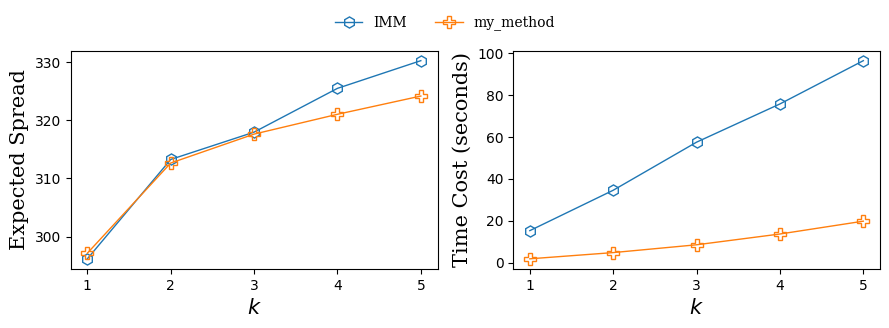

ca-netscience: n=379, m=914


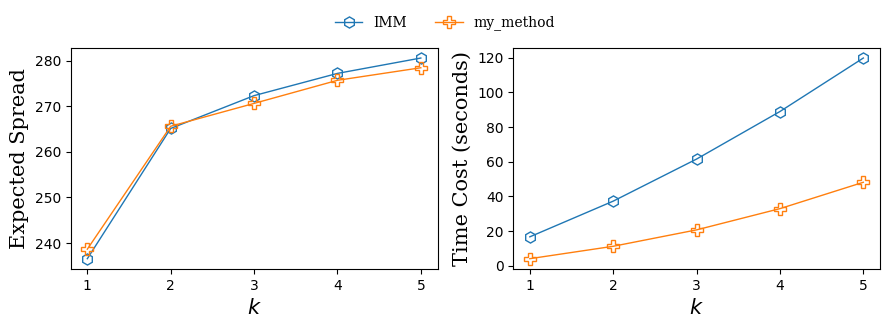

weaver: n=445, m=1335


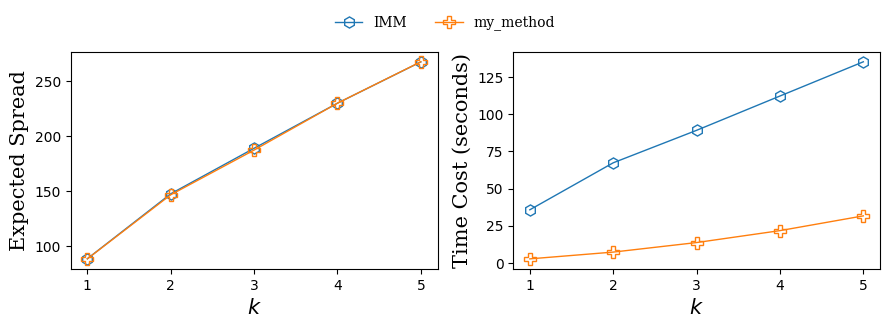

retweet-copen: n=761, m=1029


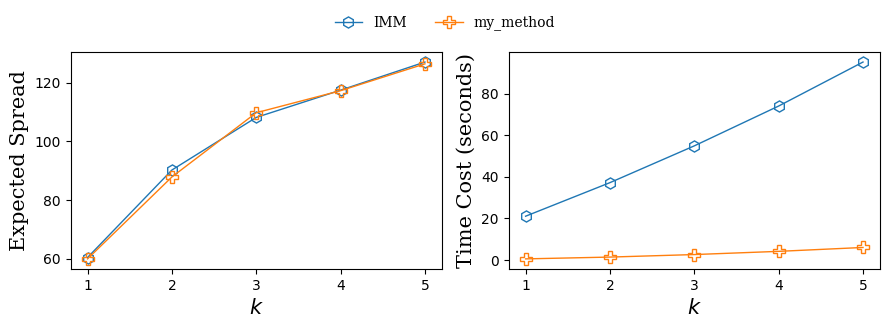

email-univ: n=1133, m=5451


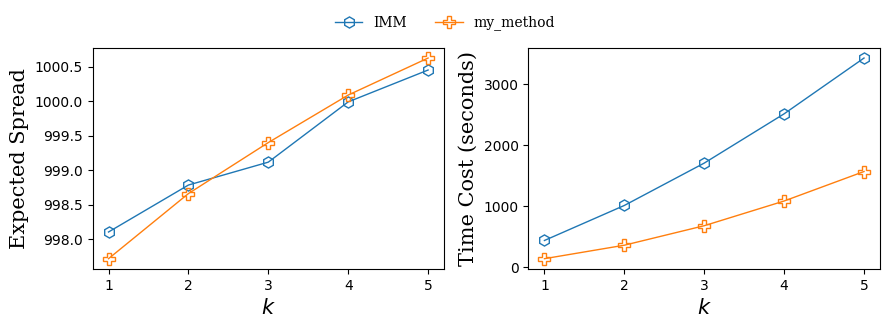

In [3]:
for i in range(0, len(large_data_list)):
    cur_G = load_instance(f"./IM_G_instances/IM_G_sketch_large_{i}.pickle")
    print(f"{large_data_names[i]}: n={cur_G.n}, m={cur_G.m}")
    IM_G_list.append(cur_G)
    vis_methods(cur_G)


In [22]:
IM_G = load_instance("./IM_G_instances/IM_G_sketch_large_4.pickle")

email-univ n=1133, m=5451


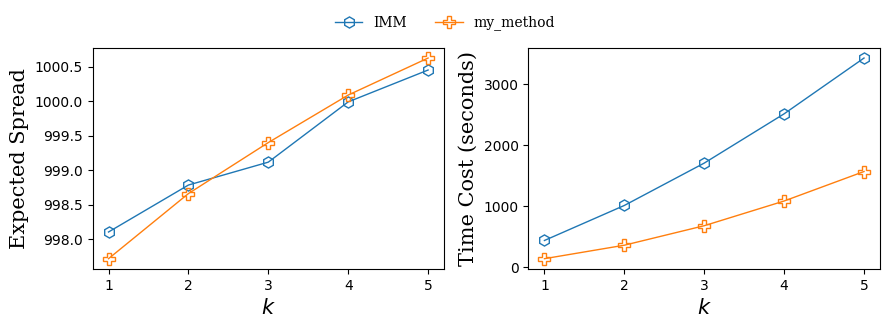

In [27]:
print(large_data_names[4], f"n={IM_G.n}, m={IM_G.m}")
vis_methods(IM_G)

In [24]:
eps_list = [i*0.05 for i in range(4, 11)]
timelapse = []
spread_list = []
for eps in eps_list:
    st = time.time()
    seed_set = IM_G.run_sketch(IM_G.k, eps)
    spread_list.append(IM_G.IC(seed_set))
    timelapse.append(time.time()-st)

The proposed algorithm is not effective, k=5.
The proposed algorithm is not effective, k=5.
The proposed algorithm is not effective, k=5.
The proposed algorithm is not effective, k=5.
The algorithm is effective, k=5. Number of RR sets=2920.
The algorithm is effective, k=5. Number of RR sets=2298.
The algorithm is effective, k=5. Number of RR sets=1854.


# Effect of $\varepsilon$

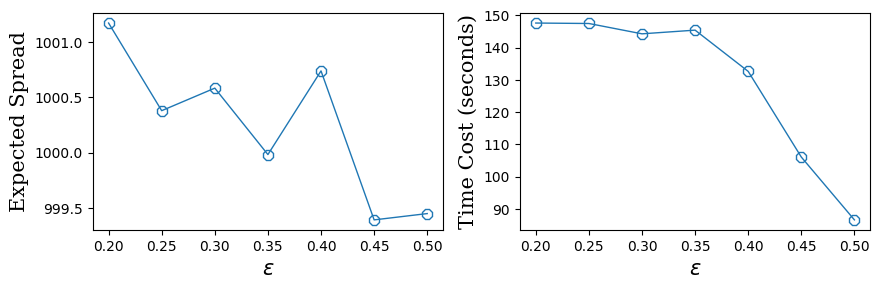

In [26]:
fig = plt.figure(figsize=(9, 3))
plt.subplot(121)

plt.plot(eps_list, spread_list, marker="8", markersize=8, mfc="None", linewidth=1)

plt.xlabel(r"$\varepsilon$", size=15)
plt.ylabel("Expected Spread", size=15, fontdict=font)

plt.subplot(122)

plt.plot(eps_list, timelapse, marker="8", markersize=8, mfc="None", linewidth=1)

plt.xlabel(r"$\varepsilon$", size=15)
plt.ylabel("Time Cost (seconds)", size=15, fontdict=font)


# handles, labels = plt.gca().get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=len(IM_G.method_spread_map.keys()), prop={"family": "serif"}, bbox_to_anchor=[0.5, 1.1], frameon=False)
plt.tight_layout()
plt.savefig("./figures/epsilon_effect.eps")
plt.show()